# Матренин Василий Николаевич. Б01-008
# Лабораторная работа \#1

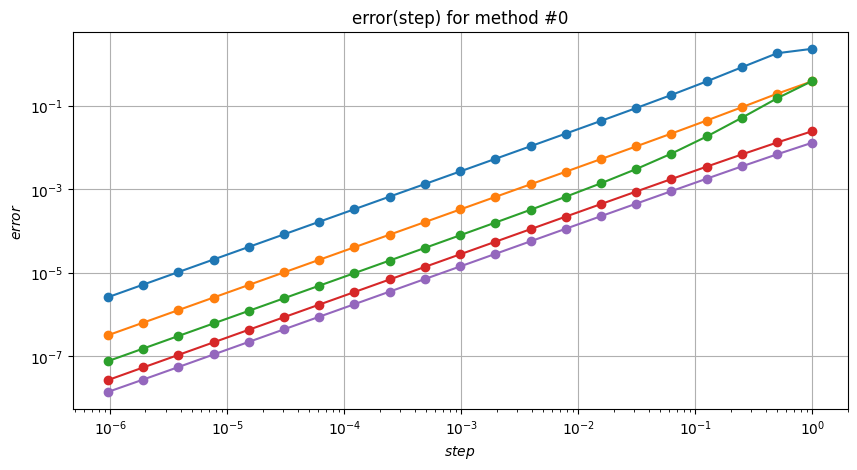

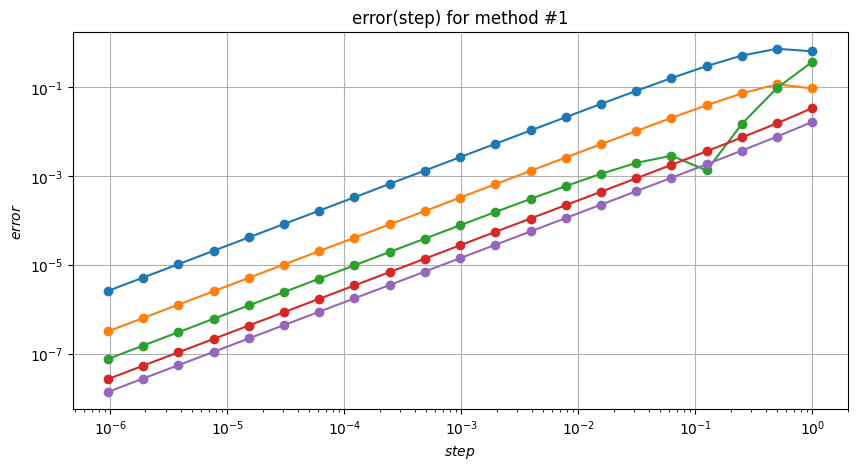

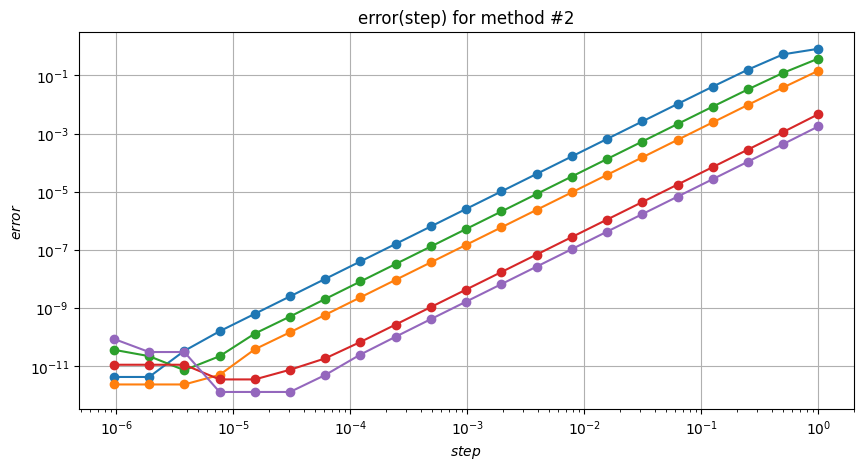

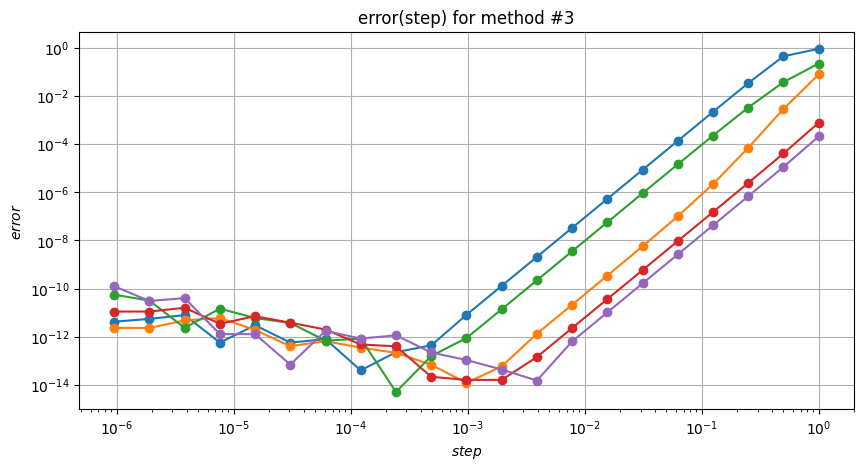

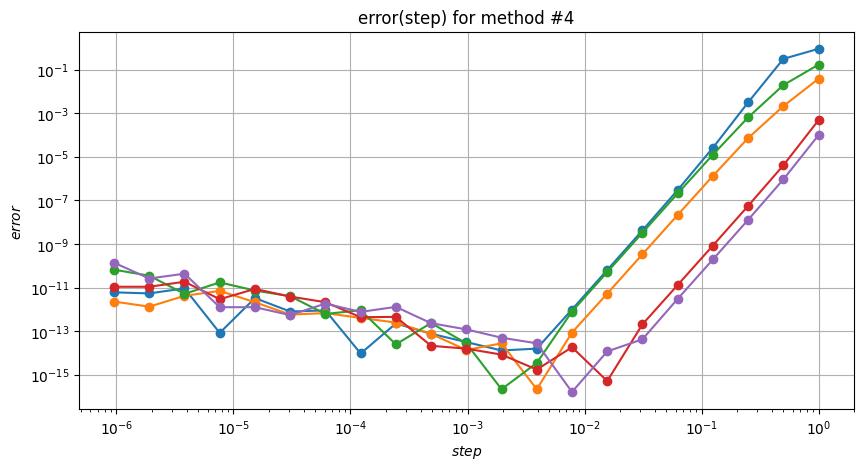

In [71]:
import numpy as np
import matplotlib.pyplot as plt

import dis

# Calculations point
POINT = 1.2

# Step values
N_MAX = 21
h = np.ones(N_MAX) / np.geomspace(1, 2**(N_MAX - 1), N_MAX)

# Test functions
def func1(x) :
    return np.sin(x*x)
def ref_func1_deriv(x) :
    return 2 * x * np.cos(x*x)

def func2(x) :
    return np.cos(np.sin(x))
def ref_func2_deriv(x) :
    return -np.cos(x) * np.sin(np.sin(x))

def func3(x) :
    return np.exp(np.sin(np.cos(x)))
def ref_func3_deriv(x) :
    return -np.sin(x) * np.cos(np.cos(x)) * func3(x)

def func4(x) :
    return np.log(x + 3)
def ref_func4_deriv(x) :
    return 1 / (x + 3)

def func5(x) :
    return (x + 3)**0.5
def ref_func5_deriv(x) :
    return 1 / (2*(x + 3)**0.5)

# Derivative calculation methods
def approx_func_deriv1(f, x, h) :
    return (f(x+h) - f(x)) / h

def approx_func_deriv2(f, x, h) :
    return (f(x) - f(x-h)) / h

def approx_func_deriv3(f, x, h) :
    return (f(x+h) - f(x-h)) / (2*h)

def approx_func_deriv4(f, x, h) :
    return approx_func_deriv3(f,x,h) * 4/3 - approx_func_deriv3(f,x,h*2) * 1/3

def approx_func_deriv5(f, x, h) :
    return approx_func_deriv3(f,x,h) * 3/2 - approx_func_deriv3(f,x,h*2) * 3/5 + approx_func_deriv3(f,x,h*3) /10

test_funcs = [func1, func2, func3, func4, func5]
test_funcs_ref_deriv = [ref_func1_deriv, ref_func2_deriv, ref_func3_deriv, ref_func4_deriv, ref_func5_deriv]
methods = [approx_func_deriv1, approx_func_deriv2, approx_func_deriv3, approx_func_deriv4, approx_func_deriv5]

for i in range(0, len(methods)) :
    method = methods[i]
    # Plots tuning
    plt.figure(figsize=[10, 5], dpi=100)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("$step$")
    plt.ylabel("$error$")
    plt.grid()
    
    for j in range(0, len(test_funcs)) :
        func = test_funcs[j]
        func_ref_deriv = test_funcs_ref_deriv[j]
        error = [abs (func_ref_deriv(POINT) - method(func, POINT, step)) for step in h]
        plt.plot(h, error,'o-')
    plt.title("error(step) for method #" + str(i))
    plt.show()
